## 회귀
* 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
* 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함. 지도학습
* 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a, b를 찾는 과정이 단순회귀분석 알고리즘

### 회귀 평가 지표
* MAE: 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
* MSE: 실제값과 예측값의 차이를 제곱해 평균한 것
 > mse, rmse는 오차가지고 함
* RMSE: MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
* R square: 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.
* R2 square: 설명력.얼마나 그 모델이 잘 설명하는지(내용추가할것)

https://blog.naver.com/PostView.nhn?blogId=bya135&logNo=222228358219&parentCategoryNo=&categoryNo=24&viewDate=&isShowPopularPosts=true&from=search<br>
https://libertegrace.tistory.com/entry/Evaluation2


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
df = pd.read_excel('./dataset/auto-mpg.xlsx', engine='openpyxl')
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [70]:
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [71]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         398 non-null    float64
 1   cylinders   398 non-null    int64  
 2   horsepower  398 non-null    object 
 3   weight      398 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 12.6+ KB


In [72]:
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [73]:
ndf.horsepower.replace('?', np.nan, inplace=True)
ndf.dropna(subset=['horsepower'], axis=0, inplace=True)
# ndf.horsepower.astype('float')

In [74]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [75]:
ndf.to_pickle('./dataset/auto-mpg.pkl')
ndf = pd.read_pickle('./dataset/auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


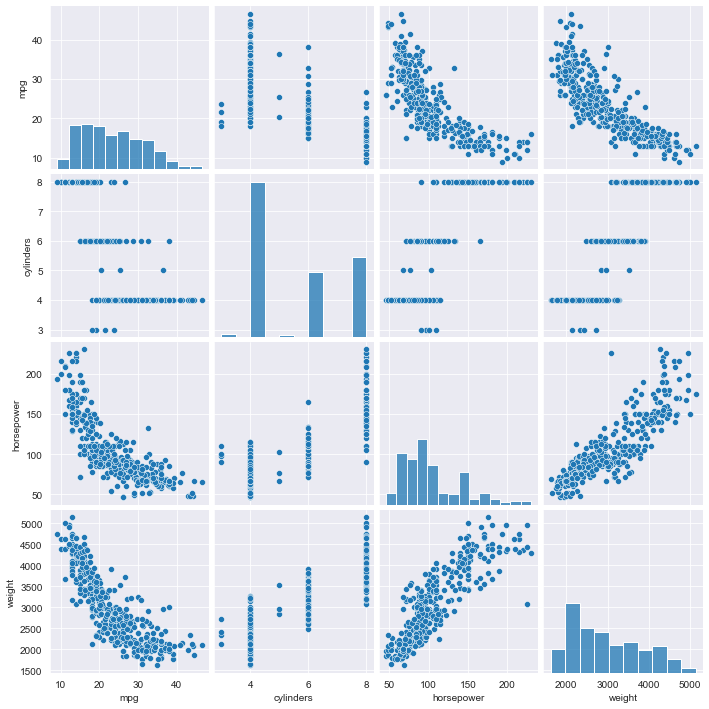

In [76]:
sns.pairplot(ndf)

In [77]:
X = ndf[['weight']] # 독립변수
y = ndf[['mpg']] # 종속변수

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)
print(len(X_train), len(X_test)) # 7:3

274 118


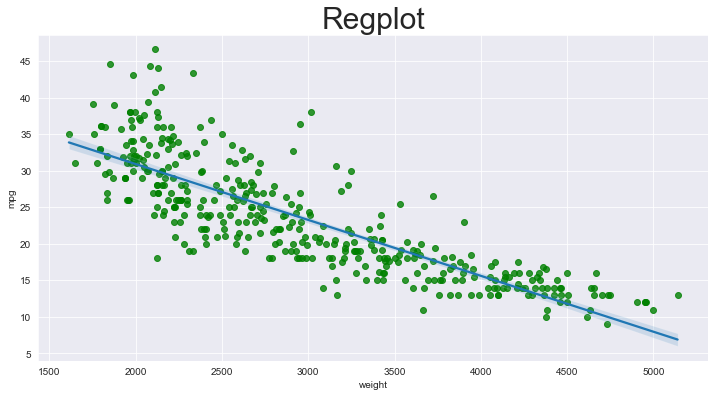

In [78]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1,figsize=(12,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data=ndf, scatter_kws={'color':'green'})
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, r2_score # r2_score : 얼마나 설명력을 갖추고 있는지

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, y_preds)

print(f'MSE:{round(mse,4)}, RMSE:{round(rmse,4)}, R2_Score:{round(r2_score,4)}')

MSE:22.169, RMSE:4.7084, R2_Score:0.6411


In [81]:
# 회귀식의 기울기, 절편
print(lr.coef_) # 기울기
print(lr.intercept_) # 절편

# 위의 그래프는 x,y값 기준이 다르게 표기되어서 기울기가 크게 나옴

[[-0.00762163]]
[45.9712177]


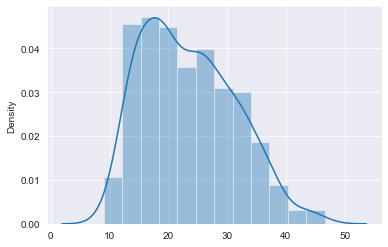

In [82]:
sns.distplot(y)
plt.show()

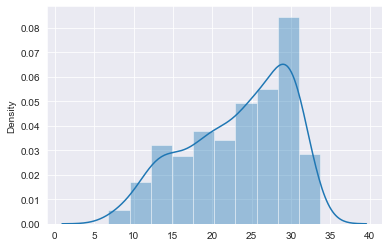

In [83]:
y_hat = lr.predict(X) # 예측값
sns.distplot(y_hat)
plt.show()

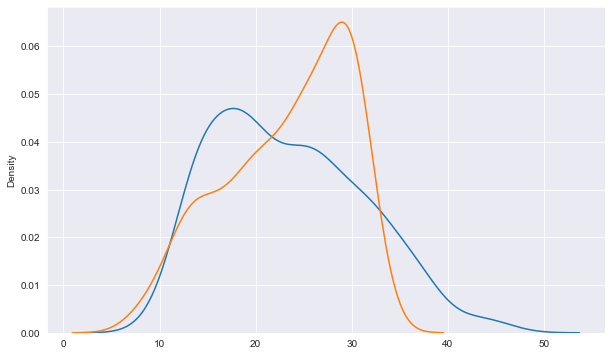

In [84]:
# 실제 값은 왼쪽으로 편향, 예측 값은 오른쪽으로 편향되는 경향을 보임 -> 모형의 오차를 줄일 필요가 있음
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')

## 다항 회귀분석
* 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
* 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명하는 알고리즘
* 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관<br>
https://chana.tistory.com/entry/%ED%95%B8%EC%A6%88%EC%98%A8-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D5-%EB%8B%A4%ED%95%AD-%ED%9A%8C%EA%B7%80

In [85]:
# p.329 선형회귀 내용 (문단2 참조)

In [86]:
ndf = pd.read_pickle('./dataset/auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [87]:
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

poly = PolynomialFeatures(degree=2) # 차원 설정
X_train_poly = poly.fit_transform(X_train)

print(X_train.shape, X_train_poly.shape)
print(poly.get_feature_names(),'\n')
print(X_train_poly[:5])  #각각의 절편 나옴

(274, 1) (274, 3)
['1', 'x0', 'x0^2'] 

[[1.0000000e+00 2.1200000e+03 4.4944000e+06]
 [1.0000000e+00 4.4990000e+03 2.0241001e+07]
 [1.0000000e+00 1.8450000e+03 3.4040250e+06]
 [1.0000000e+00 2.0450000e+03 4.1820250e+06]
 [1.0000000e+00 1.9850000e+03 3.9402250e+06]]


In [88]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train) # 학습시키는걸 poly로

# 설계한 모형의 오차가 작다면 r_square가 커지고 설계한 모형이 오차가 크다면 r_square가 작아짐
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square

0.6368479947378759

In [89]:
print(pr.coef_) # 2차항이라 기울기 3개나옴
print(pr.intercept_) # 절편

[[ 0.00000000e+00 -2.06207232e-02  2.03618732e-06]]
[65.12274143]


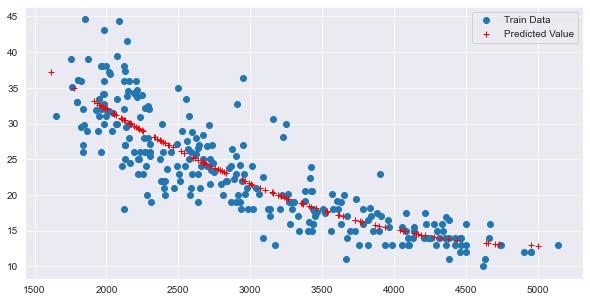

In [95]:
y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train.values, y_train.values, 'o', label='Train Data') # 데이터 분포
ax.plot(X_test.values, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best') # 범례는 자기 알아서 최선으로
plt.xlabel=('weight')
plt.ylabel=('mpg')
plt.show()

## 다중 회귀분석
* 여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석을 사용
* 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성. 지도학습

In [97]:
ndf = pd.read_pickle('./dataset/auto-mpg.pkl')
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [99]:
X = ndf.drop('mpg', axis=1)
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape, X_test.shape)

(274, 3) (118, 3)


In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = lr.score(X_test, y_test)
print(f'MSE:{round(mse,4)}, RMSE:{round(rmse,4)}, R_Square:{round(r_square,4)}')

MSE:17.3301, RMSE:4.1629, R_Square:0.6939


In [103]:
print(lr.coef_) # 독립변수 3개
print(lr.intercept_) # 절편

[-0.60691288 -0.03714088 -0.00522268]
46.41435126963405


- 과제09/15 (2) <br>
아래 boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

In [110]:
# p.324 보스턴~
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

boston = load_boston()
print(boston.keys())
bdf = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터셋의 target 배열은 주택 가격임. 이를 PRICE 칼럼으로 DataFrame에 추가

bdf['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', bdf.shape)
bdf.head()
# 독립변수가 여러개이므로 다중 회귀분석 사용
# k-fold 사용? 학습용/검증용 데이터가 충분하지 않을 경우 5개 그룹으로 나눠서
# 1개 그룹은 평가용, 4개 그룹은 학습용 >> 교차검증

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
Boston 데이터셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 파이썬 머신러닝 완벽 가이드 p.324<br>
CRIM : 지역 범죄 발생율<br>
ZN : 25,000평방피트를 초과하는 거주 지역의 비율<br>
INDUS : 비상업 지역 넓이 비율<br>
CHAS : 찰스강에 대한 더미 변수 (강의 경계에 위치한 경우는 1, 아니면 0)<br>
NOX : 일산화질소 농도<br>
RM : 거주할 수 있는 방 개수<br>
AGE : 1940년 이전에 건축된 소유 주택의 비율<br>
DIS : 5개 주요 고용센터까지의 가중 거리<br>
RAD : 고속도로 접근 용이도<br>
TAX : 10,000달러당 재산 세율<br>
PTRATIO : 지역의 교사와 학생 수 비율<br>
B : 지역의 흑인 거주 비율<br>
LSTAT : 하위 계층의 비율<br>
MEDV : 본인 소유의 주택 가격(중앙값)<br>

In [111]:
bdf.info() # null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


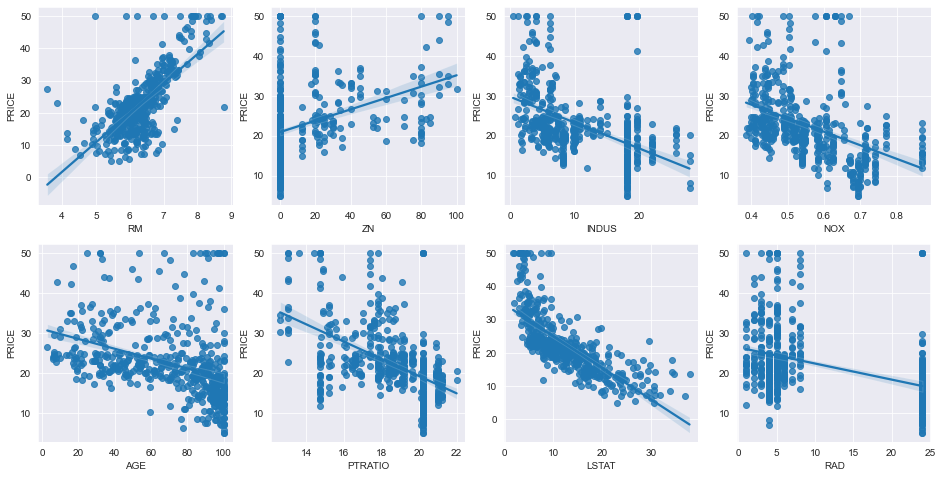

In [113]:
# 2개의 행과 4개의 열을 가진 subplots 이용. axs는 4x2개의 ax를 가짐
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # seaborn의 regplot으로 산점도, 선형 회귀 직선 같이 표현
    sns.regplot(x=feature, y='PRICE', data=bdf, ax=axs[row][col])
    
# RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타남
# RM(방 개수)는 양방향 선형성이 가장 큼

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bdf['PRICE']
X_data = bdf.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [115]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [117]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = bdf['PRICE']
X_data = bdf.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
# MSE : Mean Square Error는 예측값과 정답의 차이를 제곱. MSE는 작을 수록 좋음(오차이므로)
# RMSE : MSE에서 루트를 취함
# 여기 cross_val_score는 높은게 좋음
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_")

In [1]:
# greed-search
# https://justweon-dev.tistory.com/21

- K 폴드 교차 검증

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [8]:
# p.103
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


- stratified K 폴드

 > 불균형한 분포도를 가진 레이블(결정 클래스)을 위한 K-fold 방식
 (불균형 : 값의 분포가 한쪽으로 치우치는 것)

In [10]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts() # 세 품종 모두 50개 확인

0    50
1    50
2    50
Name: label, dtype: int64

In [14]:
# p.105~6
# stratified k- fold는 원본데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게
# 학습과 검증 데이터 세트를 분배
kfold = KFold(n_splits=3) # 3개의 폴드 세트 생성
n_iter =0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [16]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


In [20]:
# p.108 StratifiedKFold로 데이터 분리
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)
    
    # 교차 검증별 정확도 및 평균 정확도 계산
    print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
    print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))
    
    # * p.109 회귀의 결정값은 이상값 형태의 레이블이 아니라 연속된 숫자값이기 때문에
    # 결정값별로 분포를 정하는 의미가 없음


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

## 교차 검증별 정확도: [0.98]
## 평균 검증 정확도: 0.98

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

## 교차 검증별 정확도: [0.98 0.94]
## 평균 검증 정확도: 0.96

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


In [26]:
# p.110 교차 검증 간편하게 (cross_val_score())
# 교차 검증 폴드 수는 3, 성능 평가 지표는 정확도(accuracy)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4)) # cv값 지정해준 개수만큼 나옴
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- p.111 GreedSearchCV() : 머신러닝에서 많이 사용함.
 1. 최적의 파라미터를 찾아주고
 2. 교차검증도 해줌
 
 https://justweon-dev.tistory.com/21

In [28]:
# p.111 GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에 하기
grid_parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}
grid_parameters # p.112 표

{'max_depth': [1, 2, 3], 'min_samples_split': [2, 3]}

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [36]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DF로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
          'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [38]:
# p.115 최적의 파라미터값(best_params_), 그때의 정확도(best_score_)
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [39]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
